# **Phân tích Sản phẩm với Python**
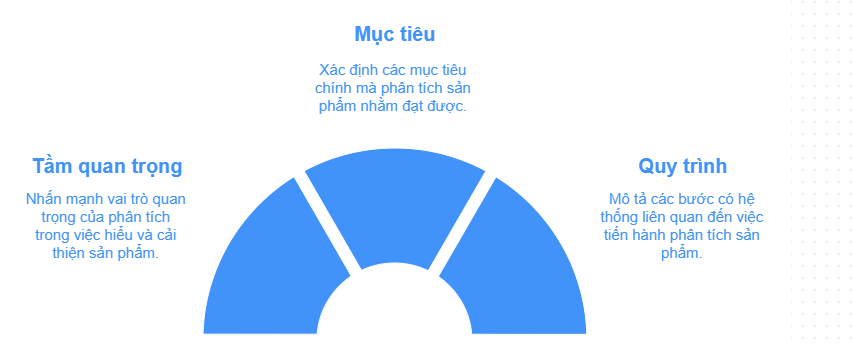


## 1. Tầm quan trọng của Phân tích Sản phẩm

- **Phân tích sản phẩm là cách để rút ra những hiểu biết sâu sắc từ dữ liệu về cách khách hàng tương tác với sản phẩm được cung cấp**, hiệu suất của các sản phẩm khác nhau và những điểm mạnh, điểm yếu có thể quan sát được trong hoạt động kinh doanh.
- Mục tiêu cuối cùng của phân tích sản phẩm không chỉ dừng lại ở việc phân tích dữ liệu mà còn là **xây dựng những hiểu biết và báo cáo mang tính hành động**, giúp tối ưu hóa và cải thiện hiệu suất sản phẩm, cũng như tạo ra các ý tưởng marketing hoặc sản phẩm mới dựa trên kết quả phân tích.

![alt text](image.png)

## 2. Các Mục tiêu Phổ biến của Phân tích Sản phẩm

- **Cải thiện khả năng giữ chân khách hàng và sản phẩm:** Phân tích hành vi xem và mua hàng giúp xác định sản phẩm được mua lặp lại và đối tượng khách hàng này, cũng như sản phẩm không được mua và khách hàng có nguy cơ rời bỏ.
- **Xác định sản phẩm phổ biến và xu hướng:** Giúp marketer hiểu rõ các sản phẩm bán chạy, là động lực chính cho doanh thu và tạo cơ hội bán chéo hoặc bán theo gói.
- **Phân khúc khách hàng và sản phẩm dựa trên các thuộc tính chính:** Dựa trên dữ liệu khách hàng và sản phẩm (ví dụ: lợi nhuận, số lượng bán, số lượng đặt lại, số lượng hoàn trả) để đưa ra các quyết định nhắm mục tiêu.
- **Phát triển chiến lược marketing với ROI cao hơn:** Phân tích ROI của các chiến lược marketing bằng cách so sánh chi phí quảng bá sản phẩm với doanh thu thu được.
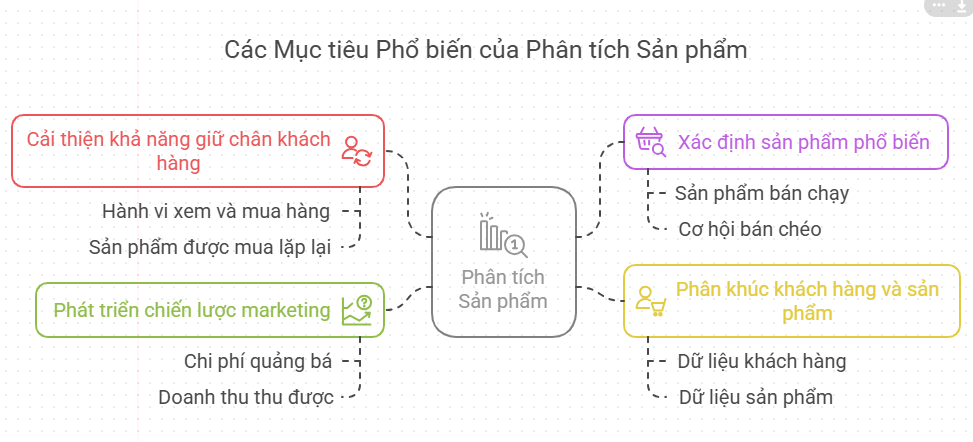



## 3. Quy trình Phân tích Sản phẩm

- Bắt đầu bằng việc **theo dõi các sự kiện**, chẳng hạn như lượt truy cập website, lượt xem trang, lịch sử duyệt web, giao dịch mua hàng hoặc bất kỳ hành động nào khác của khách hàng với sản phẩm.
- Sau đó, **phân tích và trực quan hóa các mẫu có thể quan sát được** trong các sự kiện này để tạo ra các hiểu biết hoặc báo cáo có thể hành động.
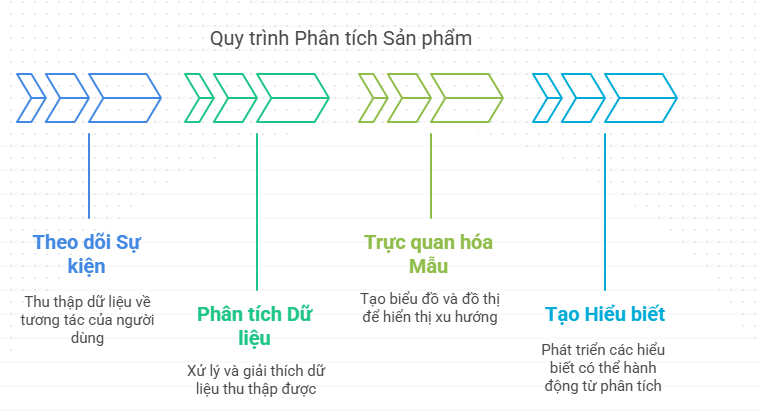

## 4. Project: Phân tích sản phẩm (Product analytics)


In [1]:
# import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Tải, đọc dữ liệu
df = pd.read_csv("OnlineRetail.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom
1,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom
2,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom
3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203422 entries, 0 to 203421
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    203422 non-null  object 
 1   StockCode    203422 non-null  object 
 2   Description  202623 non-null  object 
 3   Quantity     203422 non-null  int64  
 4   InvoiceDate  203422 non-null  object 
 5   UnitPrice    203422 non-null  float64
 6   CustomerID   150039 non-null  float64
 7   Country      203422 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 12.4+ MB


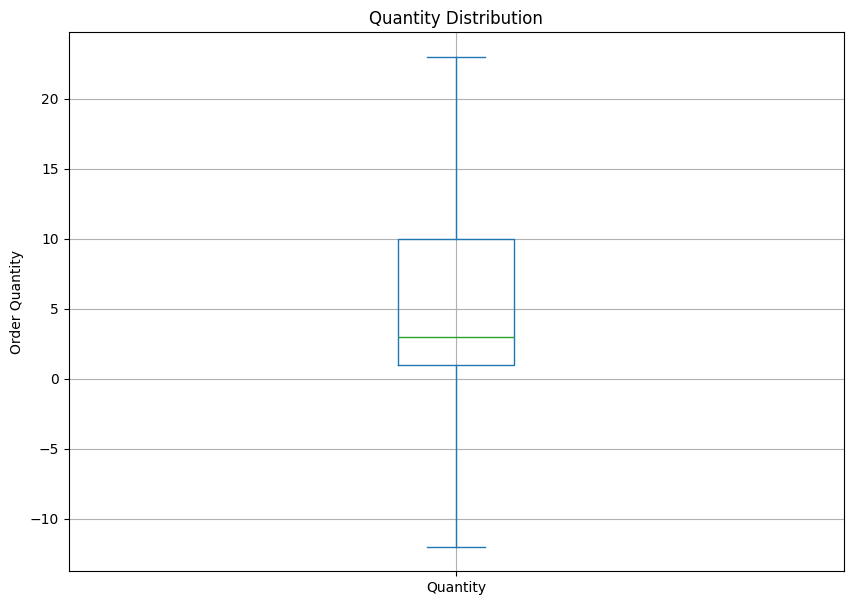

In [4]:
# vẽ biểu đồ boxplot để quan sát cột 
ax = df['Quantity'].plot.box(showfliers=False,
                             grid=True,
                             figsize=(10, 7)) 
ax.set_ylabel('Order Quantity')
ax.set_title('Quantity Distribution')
plt.suptitle("")
plt.show()

In [5]:
# nhận thấy có những đơn hàng mà số sản phẩm là âm (đây là những đơn hàn đã bị cancel, InvoiceNo có chữ "c")
df[df['Quantity']<0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
17,539994,22830,NaN,-1,2011-01-04 10:09:00,0.0,NaN,United Kingdom
18,539995,85064,NaN,-12,2011-01-04 10:12:00,0.0,NaN,United Kingdom
19,539996,21784,NaN,-10,2011-01-04 10:12:00,0.0,NaN,United Kingdom
22,539999,20892,NaN,-1,2011-01-04 10:16:00,0.0,NaN,United Kingdom
23,540000,84499,NaN,-9,2011-01-04 10:17:00,0.0,NaN,United Kingdom


In [6]:
#loại bỏ những đơn hàng đã bị hủy
df = df[df['Quantity']>0]
print(df[df['UnitPrice']<=0].head())
df = df[df['UnitPrice']>0]

     InvoiceNo StockCode Description  Quantity          InvoiceDate  \
20      539997     84689         NaN         5  2011-01-04 10:15:00   
21      539998     84675         NaN         2  2011-01-04 10:16:00   
84      540011     22501         NaN        30  2011-01-04 11:13:00   
230     540018     90112         NaN         2  2011-01-04 12:07:00   
2913    540256     35957         NaN        35  2011-01-05 17:21:00   

      UnitPrice  CustomerID         Country  
20          0.0         NaN  United Kingdom  
21          0.0         NaN  United Kingdom  
84          0.0         NaN  United Kingdom  
230         0.0         NaN  United Kingdom  
2913        0.0         NaN  United Kingdom  


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198451 entries, 0 to 203421
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    198451 non-null  object 
 1   StockCode    198451 non-null  object 
 2   Description  198451 non-null  object 
 3   Quantity     198451 non-null  int64  
 4   InvoiceDate  198451 non-null  object 
 5   UnitPrice    198451 non-null  float64
 6   CustomerID   146478 non-null  float64
 7   Country      198451 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 13.6+ MB


### **Phân tích xu hướng theo thời gian (Time series trends)**
Mục tiêu của phần **Time series trends** (Xu hướng theo thời gian) trong project có thể được tóm tắt như sau:

*   **Hiểu được xu hướng tổng thể của doanh nghiệp theo thời gian**. Phân tích chuỗi thời gian về doanh thu và số lượng đơn đặt hàng giúp nhà tiếp thị nắm bắt được liệu doanh nghiệp đang **tăng trưởng hay suy giảm** theo thời gian.
*   **Đánh giá hiệu suất kinh doanh**. Việc theo dõi các xu hướng rộng lớn này giúp nhận diện **bất kỳ vấn đề tiềm ẩn nào** có thể đang xảy ra trong doanh nghiệp.
*   **Phân tích tính mùa vụ**. Bằng cách quan sát các biến động theo tháng, có thể xác định được **ảnh hưởng của yếu tố mùa vụ** lên doanh thu và số lượng đơn hàng (ví dụ: tăng trưởng vào cuối năm đối với các doanh nghiệp thương mại điện tử). Việc so sánh dữ liệu hiện tại với dữ liệu của các năm trước được khuyến nghị để phân biệt giữa tăng trưởng thực tế và hiệu ứng mùa vụ.
*   **Cung cấp cái nhìn tổng quan trước khi đi sâu vào phân tích chi tiết hơn**. Phân tích xu hướng theo thời gian là một bước khởi đầu tốt để có được bức tranh toàn cảnh về hiệu suất kinh doanh trước khi **phân tích sâu hơn** vào các khía cạnh cụ thể hơn của sản phẩm.

Tóm lại, mục tiêu chính của việc phân tích xu hướng theo thời gian là **cung cấp một cái nhìn tổng quan về hiệu suất kinh doanh theo thời gian, nhận diện các xu hướng tăng trưởng, suy giảm hoặc tính mùa vụ, và phát hiện các vấn đề tiềm ẩn ở cấp độ tổng thể trước khi tiến hành các phân tích chi tiết hơn về sản phẩm**.

In [8]:
# chuyển cột "InvoiceDate" sang định dạng date time
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
print(df["InvoiceDate"].min(), df["InvoiceDate"].max())

2011-01-04 10:00:00 2011-06-30 20:08:00


In [9]:
# tính toán số đơn trong mỗi tháng
monthly_orders_df = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()
monthly_orders_df

C:\Users\Admin\AppData\Local\Temp\ipykernel_10832\3767293509.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()


InvoiceDate
2011-01-31    1086
2011-02-28    1100
2011-03-31    1454
2011-04-30    1246
2011-05-31    1681
2011-06-30    1533
Freq: ME, Name: InvoiceNo, dtype: int64

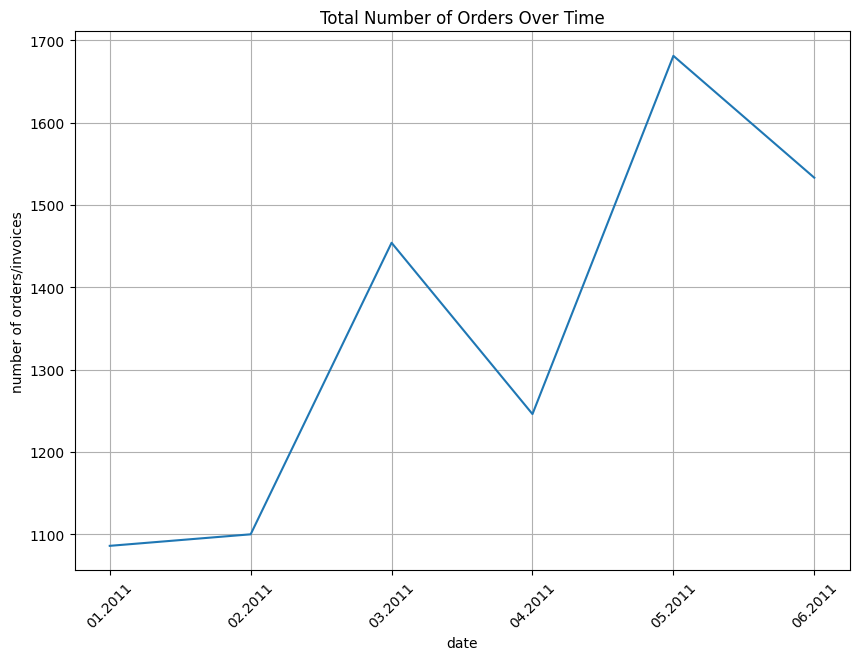

In [10]:
ax = pd.DataFrame(monthly_orders_df.values).plot(grid=True,
                                                 figsize=(10,7),
                                                 legend=False) 
ax.set_xlabel('date')
ax.set_ylabel('number of orders/invoices')
ax.set_title('Total Number of Orders Over Time')
plt.xticks( range(len(monthly_orders_df.index)),
           [x.strftime('%m.%Y') for x in monthly_orders_df.index],
           rotation=45) 
plt.show()

In [11]:
# Tính doanh thu theo tháng
df['Sales'] = df['Quantity'] * df['UnitPrice']
monthly_revenue_df = df.set_index('InvoiceDate')['Sales'].resample('M').sum()
monthly_revenue_df

C:\Users\Admin\AppData\Local\Temp\ipykernel_10832\557495061.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue_df = df.set_index('InvoiceDate')['Sales'].resample('M').sum()


InvoiceDate
2011-01-31    691364.560
2011-02-28    523631.890
2011-03-31    717639.360
2011-04-30    537808.621
2011-05-31    770536.020
2011-06-30    761739.900
Freq: ME, Name: Sales, dtype: float64

In [12]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,19.5
1,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5
2,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5
3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,10.5
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,12.5


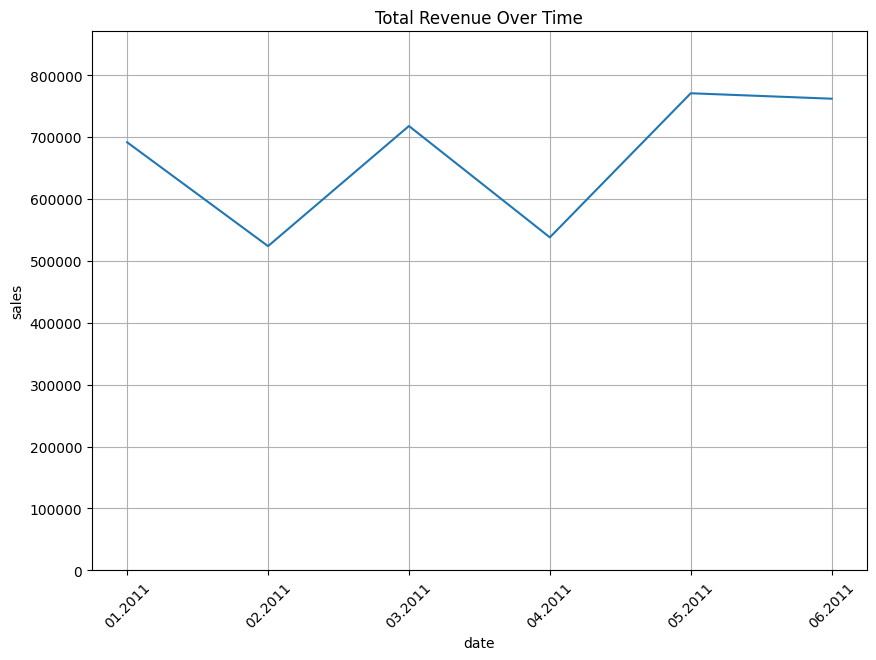

In [13]:
ax = pd.DataFrame(monthly_revenue_df.values).plot(grid=True,
                                                  figsize=(10,7),
                                                  legend=False) 
ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue Over Time')
ax.set_ylim([0, max(monthly_revenue_df.values)+100000])
plt.xticks(range(len(monthly_revenue_df.index)),
           [x.strftime('%m.%Y') for x in monthly_revenue_df.index],
           rotation=45) 
plt.show()

In [14]:
df['Country'].nunique()

36

### **Khách hàng mua lại (Repeat customers)**
- **Xác định và đo lường số lượng khách hàng quay lại mua hàng hàng tháng**. Điều này giúp doanh nghiệp hiểu được có bao nhiêu khách hàng hiện tại duy trì tương tác và tiếp tục mua sản phẩm.

- **Đánh giá tầm quan trọng của khách hàng mua lại đối với doanh thu hàng tháng**. Bằng cách so sánh doanh thu từ khách hàng mua lại với tổng doanh thu, doanh nghiệp có thể thấy được mức độ đóng góp của nhóm khách hàng trung thành này.

- **Hiểu rõ hơn về mô hình mua hàng của khách hàng trung thành theo thời gian**. Việc phân tích theo tháng cho phép nhận diện các xu hướng hoặc biến động trong hành vi mua lặp lại.

- **Nhấn mạnh tầm quan trọng của việc giữ chân khách hàng**. Kết quả phân tích thường cho thấy rằng khách hàng mua lại đóng góp một phần lớn vào doanh thu, từ đó làm nổi bật sự cần thiết của các chiến lược giữ chân khách hàng.

In [15]:
df['Month'] = df['InvoiceDate'].dt.to_period('M')
df['Month'].head()

0    2011-01
1    2011-01
2    2011-01
3    2011-01
4    2011-01
Name: Month, dtype: period[M]

In [16]:
#lấy danh sách các CustomerID theo từng tháng.
customers_by_month = df.groupby('Month')['CustomerID'].unique()

In [17]:
# kiểm tra khách nào quay lại mua hàng từ tháng trước.
retained_customers = []

months = customers_by_month.index  # danh sách các tháng

for i in range(1, len(months)):
    prev_month_customers = set(customers_by_month[months[i-1]])  # tháng trước
    curr_month_customers = set(customers_by_month[months[i]])    # tháng hiện tại

    # giao nhau giữa 2 tháng là khách quay lại
    retained = prev_month_customers & curr_month_customers

    # lưu kết quả
    retained_customers.append({
        'Month': str(months[i]),
        'RetainedCustomers': len(retained)
    })


In [18]:
retention_df = pd.DataFrame(retained_customers)
retention_df.head()

,Month,RetainedCustomers
0,2011-02,262
1,2011-03,290
2,2011-04,304
3,2011-05,368
4,2011-06,410


In [19]:
# tính doanh thu khách hàng quay lại mua hàng
retention_revenue = []

for i in range(1, len(months)):
    prev_month_customers = set(customers_by_month[months[i-1]])
    curr_month_customers = set(customers_by_month[months[i]])
    
    # Khách hàng quay lại
    returning_customers = prev_month_customers & curr_month_customers
    
    # Lọc đơn hàng của tháng hiện tại từ khách quay lại
    curr_month_data = df[df['Month'] == months[i]]
    returning_data = curr_month_data[curr_month_data['CustomerID'].isin(returning_customers)]
    
    # Doanh thu từ khách quay lại
    returning_sales = returning_data['Sales'].sum()
    
    # Tổng doanh thu tháng hiện tại
    total_sales = curr_month_data['Sales'].sum()
    
    # Tỷ lệ doanh thu từ khách quay lại
    ratio = returning_sales / total_sales * 100 if total_sales > 0 else 0

    retention_revenue.append({
        'Month': str(months[i]),
        'ReturningRevenue': returning_sales,
        'TotalRevenue': total_sales,
        'RevenueFromReturning(%)': round(ratio, 2)
    })


In [21]:
revenue_df = pd.DataFrame(retention_revenue)
print(revenue_df)

     Month  ReturningRevenue  TotalRevenue  RevenueFromReturning(%)
0  2011-02         215663.52    523631.890                    41.19
1  2011-03         275797.81    717639.360                    38.43
2  2011-04         215482.02    537808.621                    40.07
3  2011-05         363280.99    770536.020                    47.15
4  2011-06         378689.76    761739.900                    49.71


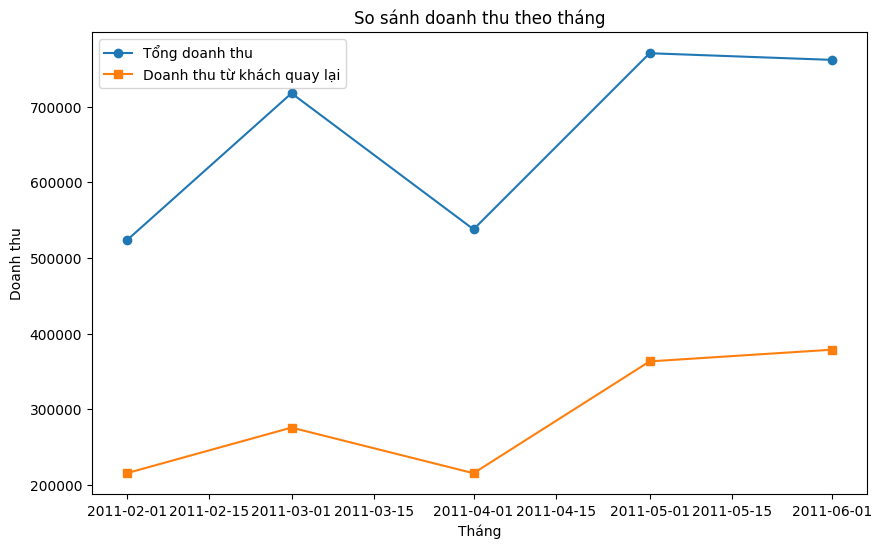

In [24]:
# Convert Month to datetime for better plotting
revenue_df['Month'] = pd.to_datetime(revenue_df['Month'])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(revenue_df['Month'], revenue_df['TotalRevenue'], marker='o', label='Tổng doanh thu')
plt.plot(revenue_df['Month'], revenue_df['ReturningRevenue'], marker='s', label='Doanh thu từ khách quay lại')
plt.title('So sánh doanh thu theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Doanh thu')
plt.legend();


### **Sản phẩm theo xu hướng theo thời gian (Trending items over time)**
Mục tiêu của phần **Sản phẩm theo xu hướng theo thời gian (Trending items over time)** là:

*   **Phân tích cách khách hàng tương tác với từng sản phẩm riêng lẻ theo thời gian**, thay vì chỉ xem xét xu hướng chung của toàn bộ doanh nghiệp.
*   **Xác định và theo dõi xu hướng bán hàng của các sản phẩm bán chạy nhất** theo thời gian.
*   **Phát hiện những thay đổi đột ngột hoặc sự tăng trưởng (spike) trong mức độ phổ biến của một số sản phẩm cụ thể**.
*   **Tìm hiểu các nguyên nhân tiềm ẩn đằng sau những xu hướng này**, ví dụ như yếu tố mùa vụ hoặc sự thay đổi thực sự trong sở thích của thị trường.
*   **Minh họa cách phân tích này có thể được sử dụng để điều chỉnh các chiến lược marketing**, chẳng hạn như đề xuất các sản phẩm đang thịnh hành trong email marketing, cuộc gọi hoặc quảng cáo để tăng tương tác và tỷ lệ chuyển đổi của khách hàng.

In [25]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Month
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,19.5,2011-01
1,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5,2011-01
2,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5,2011-01
3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,10.5,2011-01
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,12.5,2011-01
